# Steps of clustering research

In [1]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

x.shape

(150, 4)

# SVM - OneClassSVM
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM

## SVM - scaling

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
pca_scaler = PCA(n_components=4)

standard_scaler.fit(x)
minmax_scaler.fit(x)
pca_scaler.fit(x)

standard_x = standard_scaler.transform(x)
minmax_x = minmax_scaler.transform(x)
pca_x = pca_scaler.transform(x)

## SVM - choose the number of cluster

In [31]:
from sklearn.svm import OneClassSVM


svm_clf = OneClassSVM(gamma='auto',nu = 0.25).fit(standard_x)
y_pred =svm_clf.predict(standard_x)


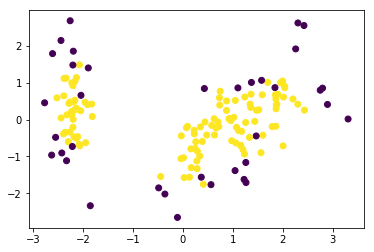

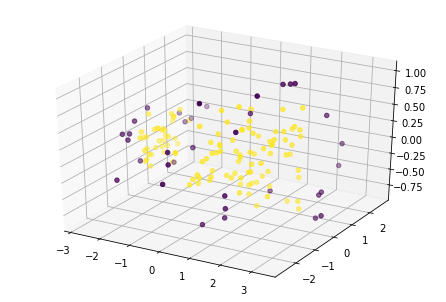

In [32]:
#check result using PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=2)
pca.fit(standard_x)  
x_pca = pca.transform(standard_x)

pca_cluster_center = PCA(n_components=2)

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,alpha=1)
plt.show()

pca = PCA(n_components=3)
pca.fit(standard_x)  
x_pca = pca.transform(standard_x)

pca_cluster_center = PCA(n_components=3)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred)
plt.show()

# SVM - silhouette_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

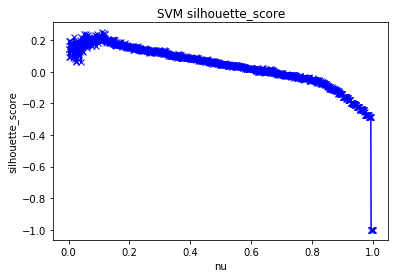

In [28]:
from sklearn.metrics import silhouette_score

silhouette_score_list = []
nu_range = np.linspace(0.0001,1,1000)

for nu_val in nu_range:
    
    svm_clf = OneClassSVM(gamma='auto',nu = nu_val).fit(standard_x)
    y_pred =svm_clf.predict(standard_x)
    
    if len(np.unique(y_pred)) > 1:
        svm_silhouette_score = silhouette_score(standard_x,y_pred)
        silhouette_score_list.append(svm_silhouette_score)
    else:
        silhouette_score_list.append(-1)
    


plt.plot(nu_range, silhouette_score_list, 'bx-')
plt.xlabel('nu')
plt.ylabel('silhouette_score')
plt.title('SVM silhouette_score')
plt.show()

In [30]:
silhouette_score_np = np.array(silhouette_score_list)
silhouette_score_np.argmax()
silhouette_score_list[110]

0.24963085826234913

## SVM  - silhouette_score - hyperparameter

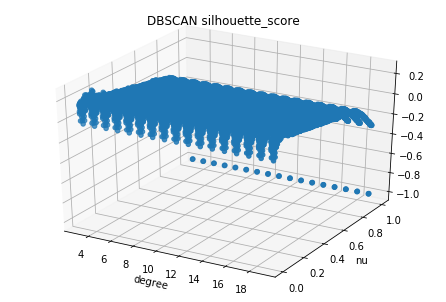

In [34]:
from mpl_toolkits.mplot3d import Axes3D

silhouette_score_list = []
nu_range = np.linspace(0.0001,1,1000)
degree_range = range(3,5*x.shape[1],1)

nu_list = list()
degree_list = list()

for nu_val in nu_range:
    for degree_val in degree_range:
    
        svm_clf = OneClassSVM(gamma='auto',nu = nu_val,degree=degree_val).fit(standard_x)
        y_pred =svm_clf.predict(standard_x)

        if len(np.unique(y_pred)) > 1:
            dbscan_silhouette_score = silhouette_score(x,y_pred)
            silhouette_score_list.append(dbscan_silhouette_score)
        else:
            silhouette_score_list.append(-1)
        nu_list.append(nu_val)
        degree_list.append(degree_val)
    

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(degree_list,nu_list, silhouette_score_list)#,c=y_pred
plt.xlabel('degree')
plt.ylabel('nu')
plt.title('DBSCAN silhouette_score')
plt.show()


## SVM - make cluster